In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('merged.csv')


In [5]:
data

,Serial,Year,Sex,Origin,Age,Height,Cigrette,Weight,CigUnit,AlcoholUnit,Diabetes,Type,Insulin,Diab3mmolg,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest
0,10104103,2005,1,1,-1,163.5,-1,48.6,-1.000000,0.0,2,NaN,-1,NaN,NaN,-2.0,-2.0,-1.0,-2.0
1,10104104,2005,2,1,-1,130.3,-1,37.7,-1.000000,-2.0,2,NaN,-1,NaN,NaN,-2.0,-2.0,-1.0,-2.0
2,10105101,2005,2,1,5,150.2,4,59.1,20.000000,-2.0,2,NaN,-1,NaN,NaN,-2.0,-2.0,-1.0,-2.0
3,10105102,2005,1,1,6,-1.0,4,-1.0,5.000000,-2.0,2,NaN,-1,NaN,NaN,-2.0,-2.0,-1.0,-2.0
4,10108101,2005,2,1,2,154.3,3,52.1,0.000000,-2.0,2,NaN,-1,NaN,NaN,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190766,2910715,2019,2,1,-1,131.0,-1,26.2,-1.000000,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
190767,2905607,2019,1,1,-1,120.0,-1,20.5,-1.000000,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
190768,2904810,2019,2,1,13,156.5,3,76.6,0.000000,0.0,-1,-1.0,-1,1.0,43.0,71.0,131.0,1.4,5.0
190769,2909942,2019,1,1,10,187.8,4,99.4,7.142857,1.0,-1,-1.0,-1,1.0,38.0,76.0,124.5,1.0,4.7


In [6]:
data=data.drop(['Type','Cigrette','Diab3mmolg'],axis=1)

In [7]:
data

,Serial,Year,Sex,Origin,Age,Height,Weight,CigUnit,AlcoholUnit,Diabetes,Insulin,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest
0,10104103,2005,1,1,-1,163.5,48.6,-1.000000,0.0,2,-1,NaN,-2.0,-2.0,-1.0,-2.0
1,10104104,2005,2,1,-1,130.3,37.7,-1.000000,-2.0,2,-1,NaN,-2.0,-2.0,-1.0,-2.0
2,10105101,2005,2,1,5,150.2,59.1,20.000000,-2.0,2,-1,NaN,-2.0,-2.0,-1.0,-2.0
3,10105102,2005,1,1,6,-1.0,-1.0,5.000000,-2.0,2,-1,NaN,-2.0,-2.0,-1.0,-2.0
4,10108101,2005,2,1,2,154.3,52.1,0.000000,-2.0,2,-1,NaN,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190766,2910715,2019,2,1,-1,131.0,26.2,-1.000000,-1.0,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0
190767,2905607,2019,1,1,-1,120.0,20.5,-1.000000,-1.0,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0
190768,2904810,2019,2,1,13,156.5,76.6,0.000000,0.0,-1,-1,43.0,71.0,131.0,1.4,5.0
190769,2909942,2019,1,1,10,187.8,99.4,7.142857,1.0,-1,-1,38.0,76.0,124.5,1.0,4.7


In [8]:
columns_to_check = ['Age', 'Height', 'Weight']

# Drop rows with negative values in specified columns
data = data[(data[columns_to_check] >=0 ).all(axis=1)]
data.to_csv('Cleaned.csv', index=False)

In [9]:
def calculate_bmi(weight_kg, height_cm):
    # Convert height from centimeters to meters
    height_m = height_cm / 100
    return weight_kg / (height_m ** 2)

# Calculate BMI for each row
data['BMI'] = calculate_bmi(data['Weight'], data['Height'])

# Save the DataFrame with BMI to the same CSV file
data.to_csv('Cleaned.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_17720\75249479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI'] = calculate_bmi(data['Weight'], data['Height'])


In [10]:
data

,Serial,Year,Sex,Origin,Age,Height,Weight,CigUnit,AlcoholUnit,Diabetes,Insulin,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest,BMI
2,10105101,2005,2,1,5,150.2,59.1,20.000000,-2.0,2,-1,NaN,-2.0,-2.0,-1.0,-2.0,26.196762
4,10108101,2005,2,1,2,154.3,52.1,0.000000,-2.0,2,-1,NaN,-1.0,-1.0,-1.0,-1.0,21.882950
6,10111101,2005,1,1,6,165.7,78.1,0.000000,-2.0,2,-1,NaN,84.5,176.5,-1.0,4.3,28.445005
7,10111102,2005,2,1,5,162.3,77.8,20.000000,-2.0,2,-1,NaN,82.0,150.0,-1.0,-1.0,29.535380
8,10117101,2005,2,1,2,151.2,69.2,20.000000,-2.0,2,-1,NaN,-1.0,-1.0,-1.0,-1.0,30.269309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190764,2911021,2019,2,1,5,170.0,89.2,0.000000,3.0,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,30.865052
190765,2904195,2019,1,1,5,175.1,76.1,0.000000,3.0,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,24.820605
190768,2904810,2019,2,1,13,156.5,76.6,0.000000,0.0,-1,-1,43.0,71.0,131.0,1.4,5.0,31.275199
190769,2909942,2019,1,1,10,187.8,99.4,7.142857,1.0,-1,-1,38.0,76.0,124.5,1.0,4.7,28.183518


In [11]:
distinct_values = data['Diabetes'].unique()

print("Distinct values in the column:")
for value in distinct_values:
    print(value)
    
n = len(data[data['Diabetes'] == 1])
print("No of YES in Dataset:",n)

n1 = len(data[data['Diabetes'] == 2])
print("No of NO in Dataset:",n1)

n2 = len(data[data['Diabetes'] == -1])
print("No of NOT APPLICABLE in Dataset:",n2)

n3 = len(data[data['Diabetes'] == -9])
print("No of REFUSED in Dataset:",n3)
              
n4 = len(data[data['Diabetes'] == -8])
print("No of DONT KNOW in Dataset:",n4)

data = data.loc[(data['Diabetes'] >= 1)]
distinct_values = data['Diabetes'].unique()

print("Distinct values in the column:")
for value in distinct_values:
    print(value)
    
data.to_csv('Cleaned.csv', index=False)

Distinct values in the column:
2
1
-1
-9
-8
No of YES in Dataset: 5805
No of NO in Dataset: 64191
No of NOT APPLICABLE in Dataset: 43744
No of REFUSED in Dataset: 1
No of DONT KNOW in Dataset: 6
Distinct values in the column:
2
1


In [12]:
columns_to_check = ['CigUnit','AlcoholUnit','IFCCA1','HDLChol','OmDiast','OmSyst','Insulin','Cholest']
data[columns_to_check] = data[columns_to_check].mask(data[columns_to_check] < 0)
data.to_csv('Cleaned.csv', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_17720\477785582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_check] = data[columns_to_check].mask(data[columns_to_check] < 0)


In [13]:
data

,Serial,Year,Sex,Origin,Age,Height,Weight,CigUnit,AlcoholUnit,Diabetes,Insulin,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest,BMI
2,10105101,2005,2,1,5,150.2,59.1,20.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,26.196762
4,10108101,2005,2,1,2,154.3,52.1,0.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,21.882950
6,10111101,2005,1,1,6,165.7,78.1,0.0,NaN,2,NaN,NaN,84.5,176.5,NaN,4.3,28.445005
7,10111102,2005,2,1,5,162.3,77.8,20.0,NaN,2,NaN,NaN,82.0,150.0,NaN,NaN,29.535380
8,10117101,2005,2,1,2,151.2,69.2,20.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,30.269309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190706,2901296,2019,1,3,13,165.6,77.5,0.0,1.0,1,2.0,NaN,NaN,NaN,NaN,NaN,28.260578
190716,2909473,2019,1,1,11,177.0,84.9,0.0,1.0,1,2.0,NaN,73.0,120.0,NaN,NaN,27.099492
190741,2902152,2019,2,3,5,160.0,71.9,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,28.085937
190751,2905364,2019,2,1,13,156.1,79.6,0.0,0.0,1,1.0,NaN,NaN,NaN,NaN,NaN,32.666850


In [14]:
columns_to_fill0 = ['CigUnit','AlcoholUnit','Cholest']
data[columns_to_fill0] = data[columns_to_fill0].fillna(0)

columns_to_fill0 = ['Insulin']
data[columns_to_fill0] = data[columns_to_fill0].fillna(2)

columns_to_fillMean = ['IFCCA1', 'HDLChol','OmDiast','OmSyst']  # Replace with your column names
# Replace missing values with the mean of specified columns
data[columns_to_fillMean] = data[columns_to_fillMean].fillna(data[columns_to_fillMean].mean())
data=data.round(2)
# Save the modified DataFrame back to a CSV file
data.to_csv('Cleaned.csv', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_17720\54247422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_fill0] = data[columns_to_fill0].fillna(0)
C:\Users\user\AppData\Local\Temp\ipykernel_17720\54247422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_fill0] = data[columns_to_fill0].fillna(2)
C:\Users\user\AppData\Local\Temp\ipykernel_17720\54247422.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [15]:
data

,Serial,Year,Sex,Origin,Age,Height,Weight,CigUnit,AlcoholUnit,Diabetes,Insulin,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest,BMI
2,10105101,2005,2,1,5,150.2,59.1,20.0,0.0,2,2.0,56.74,72.86,126.75,1.5,0.0,26.20
4,10108101,2005,2,1,2,154.3,52.1,0.0,0.0,2,2.0,56.74,72.86,126.75,1.5,0.0,21.88
6,10111101,2005,1,1,6,165.7,78.1,0.0,0.0,2,2.0,56.74,84.50,176.50,1.5,4.3,28.45
7,10111102,2005,2,1,5,162.3,77.8,20.0,0.0,2,2.0,56.74,82.00,150.00,1.5,0.0,29.54
8,10117101,2005,2,1,2,151.2,69.2,20.0,0.0,2,2.0,56.74,72.86,126.75,1.5,0.0,30.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190706,2901296,2019,1,3,13,165.6,77.5,0.0,1.0,1,2.0,56.74,72.86,126.75,1.5,0.0,28.26
190716,2909473,2019,1,1,11,177.0,84.9,0.0,1.0,1,2.0,56.74,73.00,120.00,1.5,0.0,27.10
190741,2902152,2019,2,3,5,160.0,71.9,0.0,0.0,1,2.0,56.74,72.86,126.75,1.5,0.0,28.09
190751,2905364,2019,2,1,13,156.1,79.6,0.0,0.0,1,1.0,56.74,72.86,126.75,1.5,0.0,32.67


In [16]:
data.isnull().sum()

Serial         0
Year           0
Sex            0
Origin         0
Age            0
Height         0
Weight         0
CigUnit        0
AlcoholUnit    0
Diabetes       0
Insulin        0
IFCCA1         0
OmDiast        0
OmSyst         0
HDLChol        0
Cholest        0
BMI            0
dtype: int64

In [19]:


# Check the data types of all columns
column_dtypes = data.dtypes

print("Data types of all columns:")
print(column_dtypes)

Data types of all columns:
Serial           int64
Year             int64
Sex              int64
Origin           int64
Age              int64
Height         float64
Weight         float64
CigUnit        float64
AlcoholUnit    float64
Diabetes         int64
Insulin        float64
IFCCA1         float64
OmDiast        float64
OmSyst         float64
HDLChol        float64
Cholest        float64
BMI            float64
dtype: object


In [23]:
column_names = ["Sex", "Origin", "Diabetes"]  # Replace with your column names

# Check the data type of each column
for column_name in column_names:
    data[column_name] = data[column_name].astype("category")

In [24]:

# Check the data types of all columns
column_dtypes = data.dtypes

print("Data types of all columns:")
print(column_dtypes)

Data types of all columns:
Serial            int64
Year              int64
Sex            category
Origin         category
Age               int64
Height          float64
Weight          float64
CigUnit         float64
AlcoholUnit     float64
Diabetes       category
Insulin         float64
IFCCA1          float64
OmDiast         float64
OmSyst          float64
HDLChol         float64
Cholest         float64
BMI             float64
dtype: object


In [25]:
data.to_csv('Cleaned.csv', index=False)

In [26]:
data.describe()

,Serial,Year,Age,Height,Weight,CigUnit,AlcoholUnit,Insulin,IFCCA1,OmDiast,OmSyst,HDLChol,Cholest,BMI
count,6.999600e+04,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000,69996.000000
mean,5.694758e+07,2012.261172,4.126307,167.482405,77.482086,2.296495,1.948983,1.982985,56.740009,72.858270,126.749714,1.500090,2.591970,27.564412
std,5.739857e+07,4.574000,1.939135,9.773253,17.301469,5.998375,2.377451,0.129329,0.992680,8.554183,13.700004,0.126537,2.747442,5.481719
min,2.500001e+06,2005.000000,1.000000,113.000000,26.000000,0.000000,0.000000,1.000000,34.000000,32.000000,75.500000,0.400000,0.000000,12.450000
25%,2.707087e+06,2006.000000,3.000000,160.400000,64.900000,0.000000,0.000000,2.000000,56.740000,70.000000,121.000000,1.500000,0.000000,23.750000
50%,3.651760e+07,2013.000000,4.000000,167.200000,75.600000,0.000000,1.000000,2.000000,56.740000,72.860000,126.750000,1.500000,0.000000,26.790000
75%,1.144011e+08,2016.000000,6.000000,174.500000,87.700000,0.000000,3.000000,2.000000,56.740000,75.000000,129.000000,1.500000,5.200000,30.480000
max,1.839261e+08,2019.000000,17.000000,210.300000,196.200000,86.000000,9.000000,2.000000,129.000000,160.000000,242.500000,4.400000,13.900000,69.140000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69996 entries, 2 to 190759
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Serial       69996 non-null  int64   
 1   Year         69996 non-null  int64   
 2   Sex          69996 non-null  category
 3   Origin       69996 non-null  category
 4   Age          69996 non-null  int64   
 5   Height       69996 non-null  float64 
 6   Weight       69996 non-null  float64 
 7   CigUnit      69996 non-null  float64 
 8   AlcoholUnit  69996 non-null  float64 
 9   Diabetes     69996 non-null  category
 10  Insulin      69996 non-null  float64 
 11  IFCCA1       69996 non-null  float64 
 12  OmDiast      69996 non-null  float64 
 13  OmSyst       69996 non-null  float64 
 14  HDLChol      69996 non-null  float64 
 15  Cholest      69996 non-null  float64 
 16  BMI          69996 non-null  float64 
dtypes: category(3), float64(11), int64(3)
memory usage: 10.2 MB


C:\Users\user\AppData\Local\Temp\ipykernel_17720\2926921153.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


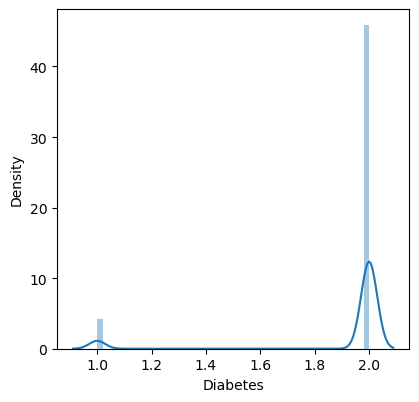

In [28]:
columns = [ 'Diabetes']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [29]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("Cleaned.csv")

# Separate features and target variable
X = data.drop(columns=["Diabetes"])
y = data["Diabetes"]

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate the resampled features and target variable
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Save the balanced dataset to a new CSV file
balanced_data.to_csv("Balanced.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_17720\1145067822.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data[column])


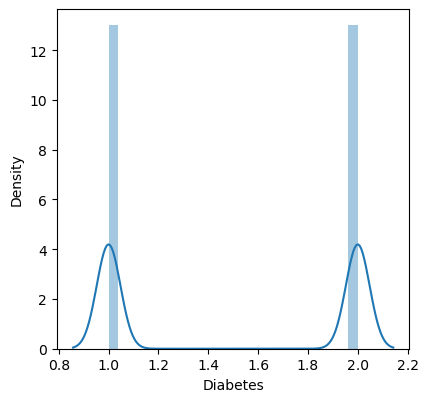

In [30]:
columns = [ 'Diabetes']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(balanced_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [3]:
balanced_data.isnull().sum()

Serial         0
Year           0
Sex            0
Origin         0
Age            0
Height         0
Weight         0
CigUnit        0
AlcoholUnit    0
Insulin        0
IFCCA1         0
OmDiast        0
OmSyst         0
HDLChol        0
Cholest        0
BMI            0
Diabetes       0
dtype: int64